In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


 <h1>Step 1 :Imports and Reading Data<h1>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

plt.style.use('ggplot') # changing the plot style
pd.set_option('display.max_columns',None)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
url = r'C:\Users\Dell\Desktop\Correlation one\Data_cleaned.csv'
df=pd.read_csv(url)
df

,ID,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Region,Medication,Health_Awareness,Obesity
0,0,41,Female,141.4,182.9,37.4,92,Moderate,0,NaN,0,4,0,0,0,Unhealthy,Student,Low,Urban,0,3,1
1,1,54,Male,130.4,252.4,17.9,81,Moderate,0,Moderate,0,10,1,1,0,Healthy,Unemployed,Moderate,Rural,0,1,0
2,2,24,Male,144.8,142.5,31.6,71,Low,1,NaN,0,8,0,0,0,Healthy,Employed,Low,Rural,1,3,0
3,3,59,Female,163.1,312.4,11.4,67,Moderate,0,Moderate,1,1,0,0,1,Healthy,Employed,Moderate,Rural,1,5,0
4,4,20,Male,120.7,298.4,29.3,90,High,1,Heavy,1,6,0,0,0,Healthy,Student,Low,Urban,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49209,49209,48,Male,131.8,165.1,22.6,96,Low,0,NaN,0,3,0,0,0,Unhealthy,Employed,Low,Rural,0,1,0
49210,49210,36,Male,137.8,204.0,20.7,70,Moderate,0,NaN,0,2,0,0,0,Unhealthy,Student,Moderate,Rural,0,3,1
49211,49211,27,Female,149.3,180.6,31.3,85,Moderate,0,NaN,0,2,0,0,0,Mixed,Student,Moderate,Rural,0,5,0
49212,49212,17,Female,127.2,206.3,25.9,77,Moderate,0,Moderate,0,7,0,0,0,Mixed,Student,Moderate,Rural,0,3,0


In [4]:
df.shape 

(49214, 22)

<h1>Step 2:  Data Preperation <h1>

In [5]:
df.info() # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49214 entries, 0 to 49213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49214 non-null  int64  
 1   Age                    49214 non-null  int64  
 2   Gender                 49214 non-null  object 
 3   Blood_Pressure         49214 non-null  float64
 4   Cholesterol            49214 non-null  float64
 5   BMI                    49214 non-null  float64
 6   Heart_Rate             49214 non-null  int64  
 7   Exercise_Level         49214 non-null  object 
 8   Smoking                49214 non-null  int64  
 9   Alcohol_Consumption    14700 non-null  object 
 10  Diabetes               49214 non-null  int64  
 11  Stress_Level           49214 non-null  int64  
 12  Heart_Attack           49214 non-null  int64  
 13  Angina                 49214 non-null  int64  
 14  Heart_Disease_History  49214 non-null  int64  
 15  Di

##### since python reads the "None" values in alcohol consumption column as NULL , we need to fix this. 

In [6]:
df['Alcohol_Consumption']=df['Alcohol_Consumption'].fillna("No") 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49214 entries, 0 to 49213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49214 non-null  int64  
 1   Age                    49214 non-null  int64  
 2   Gender                 49214 non-null  object 
 3   Blood_Pressure         49214 non-null  float64
 4   Cholesterol            49214 non-null  float64
 5   BMI                    49214 non-null  float64
 6   Heart_Rate             49214 non-null  int64  
 7   Exercise_Level         49214 non-null  object 
 8   Smoking                49214 non-null  int64  
 9   Alcohol_Consumption    49214 non-null  object 
 10  Diabetes               49214 non-null  int64  
 11  Stress_Level           49214 non-null  int64  
 12  Heart_Attack           49214 non-null  int64  
 13  Angina                 49214 non-null  int64  
 14  Heart_Disease_History  49214 non-null  int64  
 15  Di

In [8]:
df.dtypes #Data types of all columns

ID                         int64
Age                        int64
Gender                    object
Blood_Pressure           float64
Cholesterol              float64
BMI                      float64
Heart_Rate                 int64
Exercise_Level            object
Smoking                    int64
Alcohol_Consumption       object
Diabetes                   int64
Stress_Level               int64
Heart_Attack               int64
Angina                     int64
Heart_Disease_History      int64
Diet                      object
Occupation                object
Physical_Activity         object
Region                    object
Medication                 int64
Health_Awareness           int64
Obesity                    int64
dtype: object

##### Statistic summary of numeric columns

In [9]:
df[["Age","Blood_Pressure","Cholesterol","BMI","Heart_Rate","Stress_Level","Health_Awareness"]].describe() 

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Stress_Level,Health_Awareness
count,49214.000000,49214.000000,49214.000000,49214.000000,49214.000000,49214.000000,49214.000000
mean,36.021031,124.729408,212.019600,26.975728,84.502723,5.519344,3.000325
std,14.188686,17.994506,57.403629,6.002399,11.512470,2.872917,1.414688
min,12.000000,51.500000,80.000000,0.500000,65.000000,1.000000,1.000000
25%,24.000000,112.700000,171.400000,23.000000,75.000000,3.000000,2.000000
50%,36.000000,124.700000,210.850000,27.000000,85.000000,6.000000,3.000000
75%,48.000000,136.900000,250.800000,31.000000,94.000000,8.000000,4.000000
max,60.000000,202.400000,437.600000,53.200000,104.000000,10.000000,5.000000


##### checking for duplicates

In [10]:
df.loc[df.duplicated()] 

,ID,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Region,Medication,Health_Awareness,Obesity


##### Adding new column to set age values into Groups 

In [11]:
df["Age_Group"] = np.where((df['Age'] >= 12) & (df['Age'] <= 18), 'Teenagers',
                           np.where((df['Age'] >= 19) & (df['Age'] <= 30), 'Young Adults',
                                    np.where((df['Age'] >= 31) & (df['Age'] <= 45), 'Middle-Aged',
                                             np.where((df['Age'] >= 46) & (df['Age'] <= 60), 'Seniors', 'Unknown'))))



In [72]:
heart_attack = df[df["Heart_Attack"] == 1]["ID"].agg("count")
angina = df[df["Angina"] == 1]["ID"].agg("count")
both = df[(df["Angina"] == 1) & (df["Heart_Attack"] == 1)]["ID"].agg("count")

print(f"No. Heart attack patients: {heart_attack}")
print(f"No. Angina patients: {angina}")
print(f"No. Heart attack patients with angina: {both}")


No. Heart attack patients: 4915
No. Angina patients: 5962
No. Heart attack patients with angina: 558


<h1>Step 3 : Feature Understanding<h1>

##### checking the values of catgorical columns as well as the count of records for each

In [13]:
columns=["Gender","Exercise_Level","Alcohol_Consumption","Diet","Occupation","Physical_Activity","Region","Age_Group"]
for column in columns :
    counts=df[column].value_counts()
    print(counts)
    print("\n")                     

Gender
Male      24154
Female    24132
Other       928
Name: count, dtype: int64


Exercise_Level
Moderate    19825
Low         19653
High         9736
Name: count, dtype: int64


Alcohol_Consumption
No          34514
Moderate    12237
Heavy        2463
Name: count, dtype: int64


Diet
Unhealthy    19727
Mixed        14828
Healthy      14659
Name: count, dtype: int64


Occupation
Employed      24598
Student       14712
Unemployed     7387
Retired        2517
Name: count, dtype: int64


Physical_Activity
Moderate    19659
Low         19536
High        10019
Name: count, dtype: int64


Region
Rural    29518
Urban    19696
Name: count, dtype: int64


Age_Group
Seniors         15146
Middle-Aged     14916
Young Adults    12171
Teenagers        6981
Name: count, dtype: int64




#### Plotting the number of heart attack patients and Angina patiens for each occupation


[Text(0, 5, '2464'), Text(0, 5, '1477'), Text(0, 5, '734'), Text(0, 5, '240')]

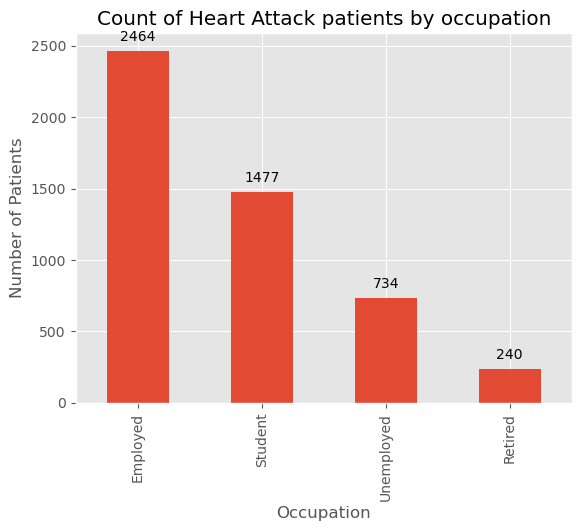

In [14]:
ax=df[df['Heart_Attack'] == 1]['Occupation'].value_counts().plot(kind='bar',title='Count of Heart Attack patients by occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)



[Text(0, 5, '3031'), Text(0, 5, '1756'), Text(0, 5, '888'), Text(0, 5, '287')]

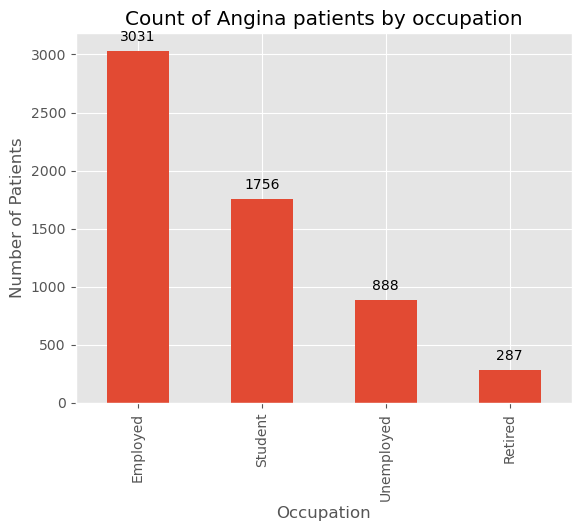

In [15]:
ax=df[df['Angina'] == 1]['Occupation'].value_counts().plot(kind='bar',title='Count of Angina patients by occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)



[Text(0, 5, '283'), Text(0, 5, '173'), Text(0, 5, '84'), Text(0, 5, '18')]

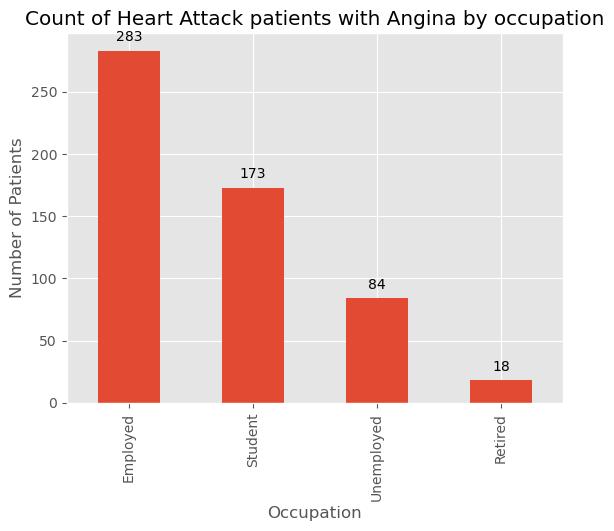

In [16]:
ax = df[(df['Angina'] == 1) & (df['Heart_Attack'] == 1)]['Occupation'].value_counts().plot(kind='bar', title='Count of Heart Attack patients with Angina by occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


##### Plotting the number of heart attack and Angina patients for each stress level

[Text(0, 5, '538'),
 Text(0, 5, '510'),
 Text(0, 5, '495'),
 Text(0, 5, '495'),
 Text(0, 5, '489'),
 Text(0, 5, '488'),
 Text(0, 5, '486'),
 Text(0, 5, '483'),
 Text(0, 5, '477'),
 Text(0, 5, '454')]

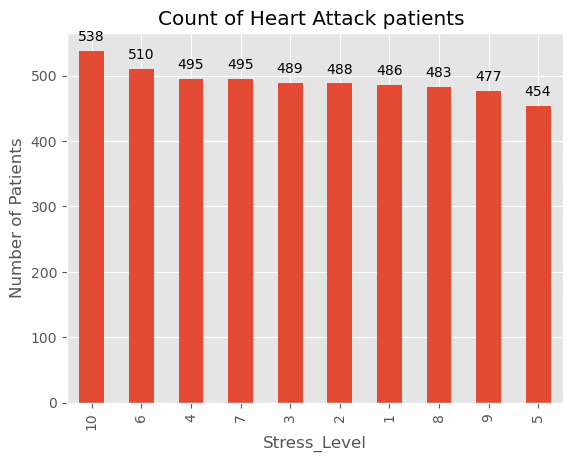

In [17]:
ax=df[df['Heart_Attack'] == 1]['Stress_Level'].value_counts().plot(kind='bar',title='Count of Heart Attack patients ')
ax.set_xlabel('Stress_Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '663'),
 Text(0, 5, '608'),
 Text(0, 5, '607'),
 Text(0, 5, '603'),
 Text(0, 5, '593'),
 Text(0, 5, '591'),
 Text(0, 5, '590'),
 Text(0, 5, '573'),
 Text(0, 5, '567'),
 Text(0, 5, '567')]

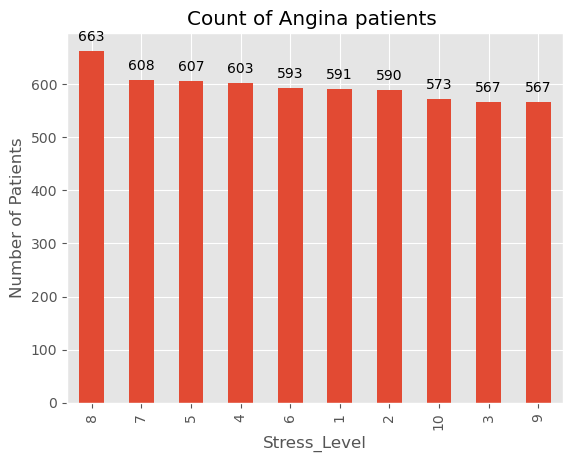

In [18]:
ax=df[df['Angina'] == 1]['Stress_Level'].value_counts().plot(kind='bar',title='Count of Angina patients ')
ax.set_xlabel('Stress_Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '67'),
 Text(0, 5, '64'),
 Text(0, 5, '62'),
 Text(0, 5, '62'),
 Text(0, 5, '58'),
 Text(0, 5, '57'),
 Text(0, 5, '48'),
 Text(0, 5, '48'),
 Text(0, 5, '46'),
 Text(0, 5, '46')]

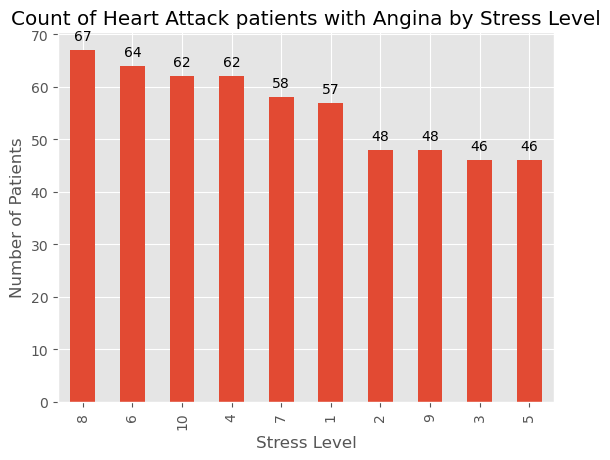

In [19]:
ax = df[(df['Heart_Attack'] == 1) & (df['Angina'] == 1)]['Stress_Level'].value_counts().plot(kind='bar', title='Count of Heart Attack patients with Angina by Stress Level')
ax.set_xlabel('Stress Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)



##### Plotting the number of heart attack and Angina patients for each health awareness level

[Text(0, 5, '1019'),
 Text(0, 5, '1005'),
 Text(0, 5, '994'),
 Text(0, 5, '964'),
 Text(0, 5, '933')]

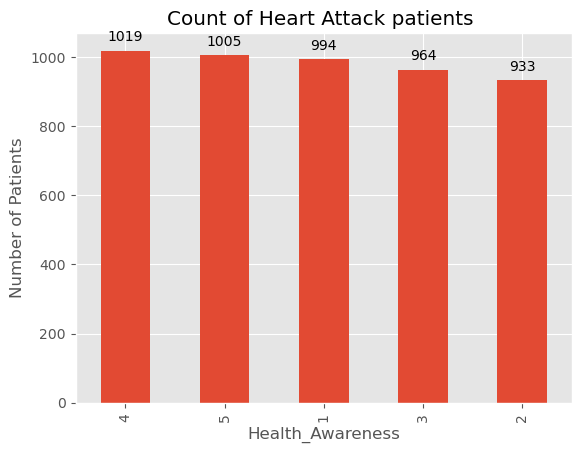

In [20]:
ax=df[df['Heart_Attack'] == 1]['Health_Awareness'].value_counts().plot(kind='bar',title='Count of Heart Attack patients ')
ax.set_xlabel('Health_Awareness')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '1019'),
 Text(0, 5, '1005'),
 Text(0, 5, '994'),
 Text(0, 5, '964'),
 Text(0, 5, '933')]

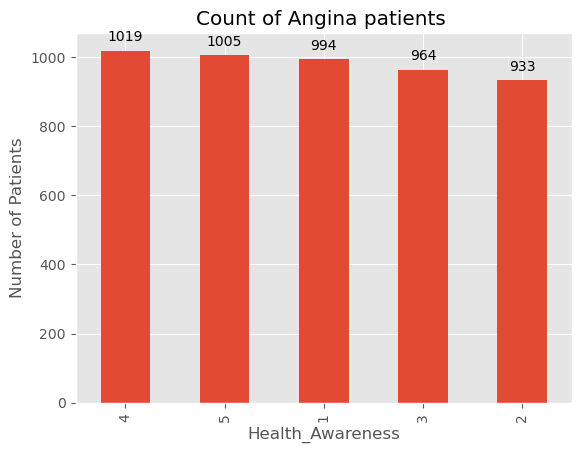

In [21]:
ax=df[df['Heart_Attack'] == 1]['Health_Awareness'].value_counts().plot(kind='bar',title='Count of Angina patients ')
ax.set_xlabel('Health_Awareness')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)

[Text(0, 5, '135'),
 Text(0, 5, '126'),
 Text(0, 5, '107'),
 Text(0, 5, '100'),
 Text(0, 5, '90')]

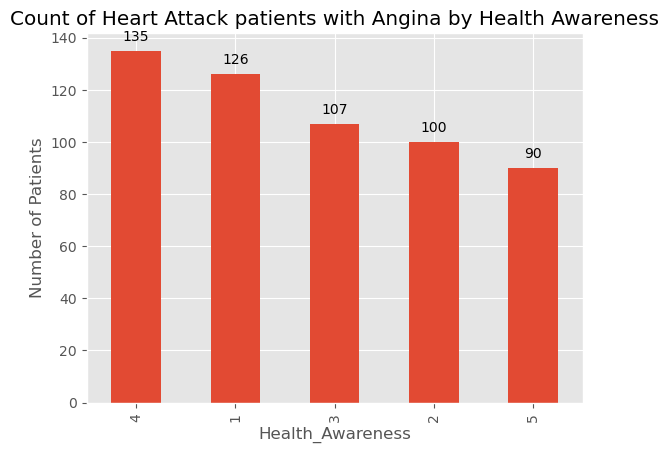

In [22]:
ax = df[(df['Heart_Attack'] == 1) & (df['Angina'] == 1)]['Health_Awareness'].value_counts().plot(kind='bar', title='Count of Heart Attack patients with Angina by Health Awareness')
ax.set_xlabel('Health_Awareness')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


##### Plotting the number of heart attack  and Angina patients for each Exercise Level

[Text(0, 5, '2029'), Text(0, 5, '1930'), Text(0, 5, '956')]

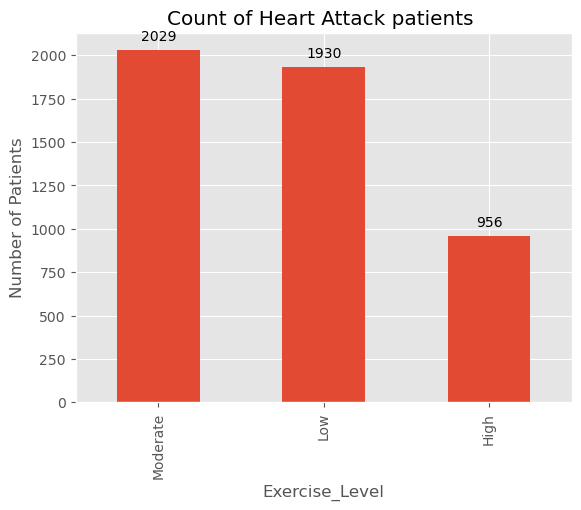

In [23]:
ax=df[df['Heart_Attack'] == 1]['Exercise_Level'].value_counts().plot(kind='bar',title='Count of Heart Attack patients ')
ax.set_xlabel('Exercise_Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '2432'), Text(0, 5, '2411'), Text(0, 5, '1119')]

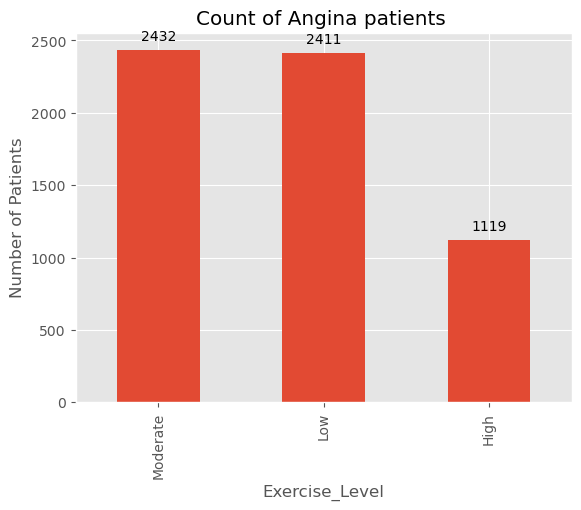

In [24]:
ax=df[df['Angina'] == 1]['Exercise_Level'].value_counts().plot(kind='bar',title='Count of Angina patients ')
ax.set_xlabel('Exercise_Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)

[Text(0, 5, '227'), Text(0, 5, '217'), Text(0, 5, '114')]

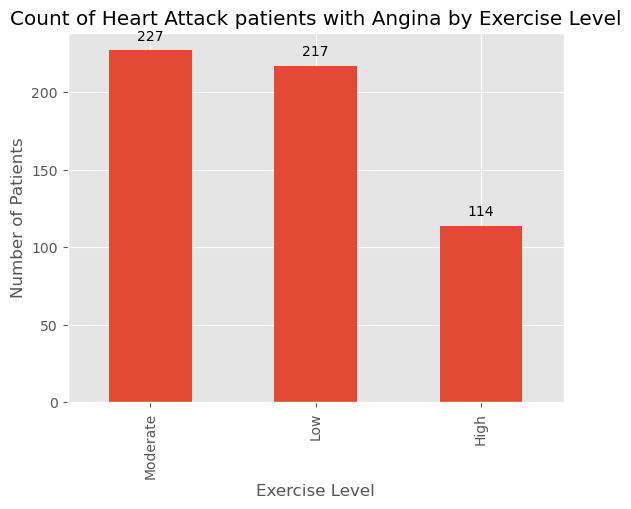

In [25]:
ax = df[(df['Heart_Attack'] == 1) & (df['Angina'] == 1)]['Exercise_Level'].value_counts().plot(kind='bar', title='Count of Heart Attack patients with Angina by Exercise Level')
ax.set_xlabel('Exercise Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


##### Plotting the number of heart attack and angina patients by age group

[Text(0, 5, '1525'), Text(0, 5, '1472'), Text(0, 5, '1220'), Text(0, 5, '698')]

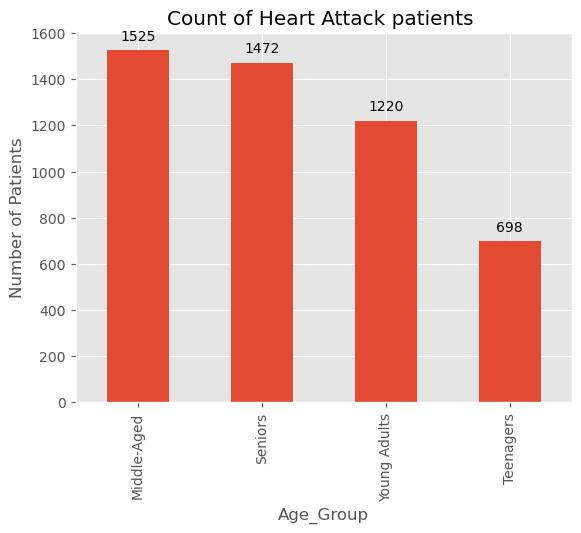

In [26]:
ax=df[df['Heart_Attack'] == 1]['Age_Group'].value_counts().plot(kind='bar',title='Count of Heart Attack patients ')
ax.set_xlabel('Age_Group')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '1835'), Text(0, 5, '1832'), Text(0, 5, '1439'), Text(0, 5, '856')]

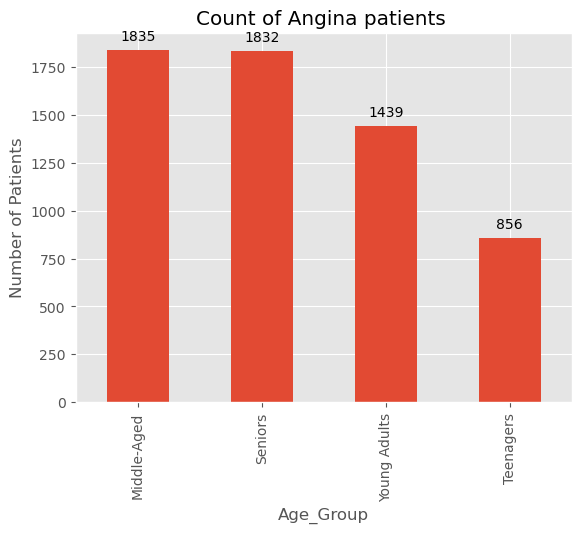

In [27]:
ax=df[df['Angina'] == 1]['Age_Group'].value_counts().plot(kind='bar',title='Count of Angina patients ')
ax.set_xlabel('Age_Group')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


[Text(0, 5, '175'), Text(0, 5, '162'), Text(0, 5, '138'), Text(0, 5, '83')]

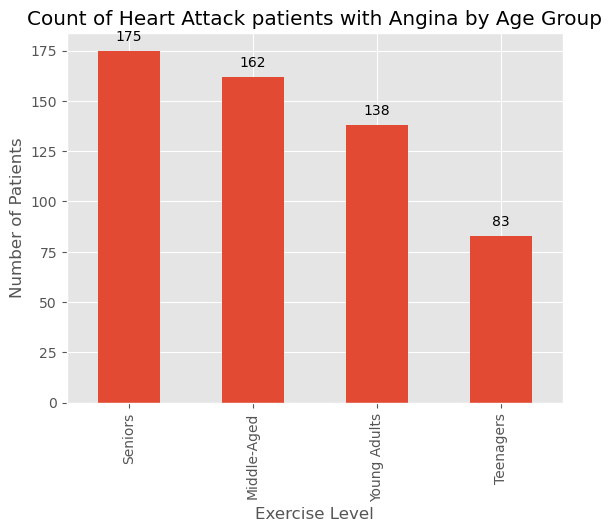

In [28]:
ax = df[(df['Heart_Attack'] == 1) & (df['Angina'] == 1)]['Age_Group'].value_counts().plot(kind='bar', title='Count of Heart Attack patients with Angina by Age Group')
ax.set_xlabel('Exercise Level')
ax.set_ylabel('Number of Patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)


<h1>Step 4 : Feature Relationships <h1>

##### Scatter plot of heart rate and blood pressure  

<AxesSubplot:title={'center':'Heart_Rate Vs. Blood_Pressure'}, xlabel='Heart_Rate', ylabel='Blood_Pressure'>

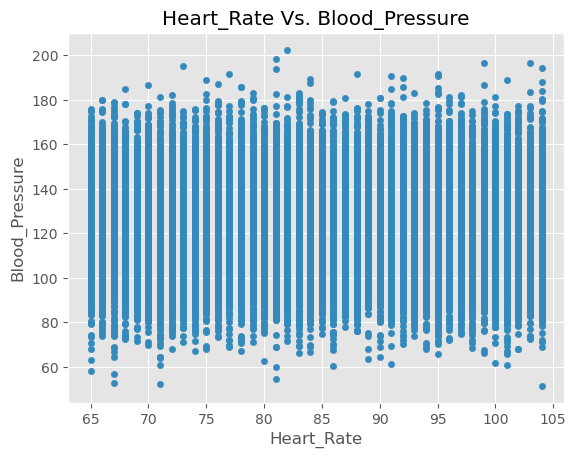

In [29]:
df.plot(kind='scatter' ,x='Heart_Rate', y='Blood_Pressure', title ='Heart_Rate Vs. Blood_Pressure')

###### Scatter plot of BMI and Blood Pressure 

<AxesSubplot:title={'center':'BMI Vs. Blood_Pressure'}, xlabel='BMI', ylabel='Blood_Pressure'>

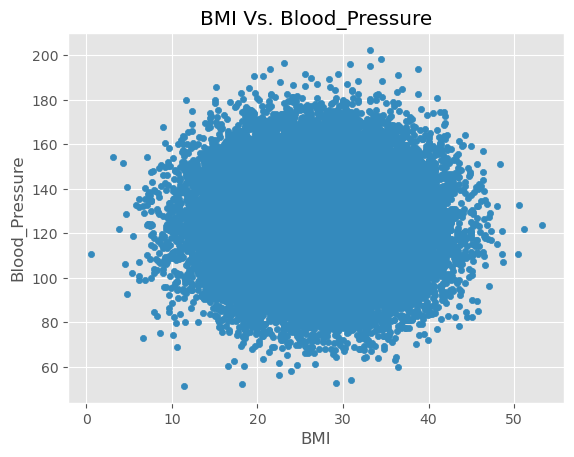

In [30]:
df.plot(kind='scatter' ,x='BMI', y='Blood_Pressure', title ='BMI Vs. Blood_Pressure')

##### Finding the correlation between Blood pressure ,BMI , Heart rate , Angina and Heart attack 

In [31]:
df_corr=df[['Heart_Attack','Angina',
                   'Blood_Pressure','Heart_Rate','BMI']].dropna().corr()

<AxesSubplot:>

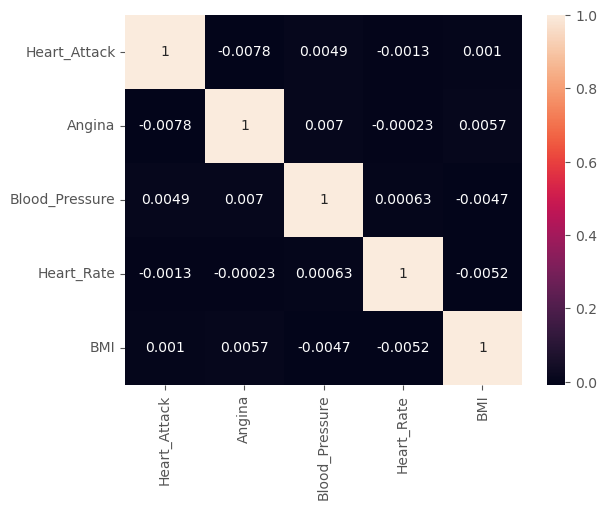

In [32]:
sns.heatmap(df_corr,annot=True)

In [33]:
df

,ID,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Region,Medication,Health_Awareness,Obesity,Age_Group
0,0,41,Female,141.4,182.9,37.4,92,Moderate,0,No,0,4,0,0,0,Unhealthy,Student,Low,Urban,0,3,1,Middle-Aged
1,1,54,Male,130.4,252.4,17.9,81,Moderate,0,Moderate,0,10,1,1,0,Healthy,Unemployed,Moderate,Rural,0,1,0,Seniors
2,2,24,Male,144.8,142.5,31.6,71,Low,1,No,0,8,0,0,0,Healthy,Employed,Low,Rural,1,3,0,Young Adults
3,3,59,Female,163.1,312.4,11.4,67,Moderate,0,Moderate,1,1,0,0,1,Healthy,Employed,Moderate,Rural,1,5,0,Seniors
4,4,20,Male,120.7,298.4,29.3,90,High,1,Heavy,1,6,0,0,0,Healthy,Student,Low,Urban,1,4,1,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49209,49209,48,Male,131.8,165.1,22.6,96,Low,0,No,0,3,0,0,0,Unhealthy,Employed,Low,Rural,0,1,0,Seniors
49210,49210,36,Male,137.8,204.0,20.7,70,Moderate,0,No,0,2,0,0,0,Unhealthy,Student,Moderate,Rural,0,3,1,Middle-Aged
49211,49211,27,Female,149.3,180.6,31.3,85,Moderate,0,No,0,2,0,0,0,Mixed,Student,Moderate,Rural,0,5,0,Young Adults
49212,49212,17,Female,127.2,206.3,25.9,77,Moderate,0,Moderate,0,7,0,0,0,Mixed,Student,Moderate,Rural,0,3,0,Teenagers


##### Bar chart of the count of heart attack and Angina patients grouped by Physical activity and Diet  

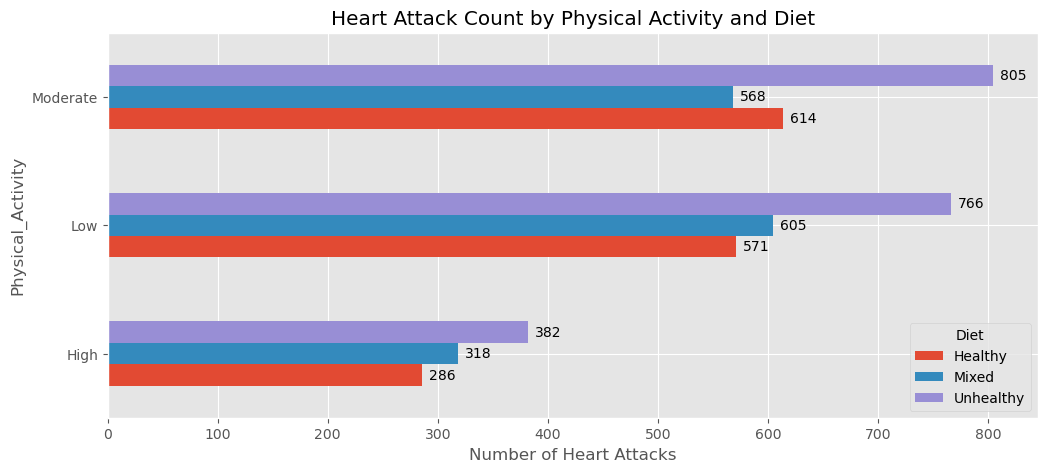

In [34]:

ax = df.groupby(['Physical_Activity', 'Diet'])["Heart_Attack"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart Attack Count by Physical Activity and Diet')
ax.set_xlabel('Number of Heart Attacks')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)

plt.show()



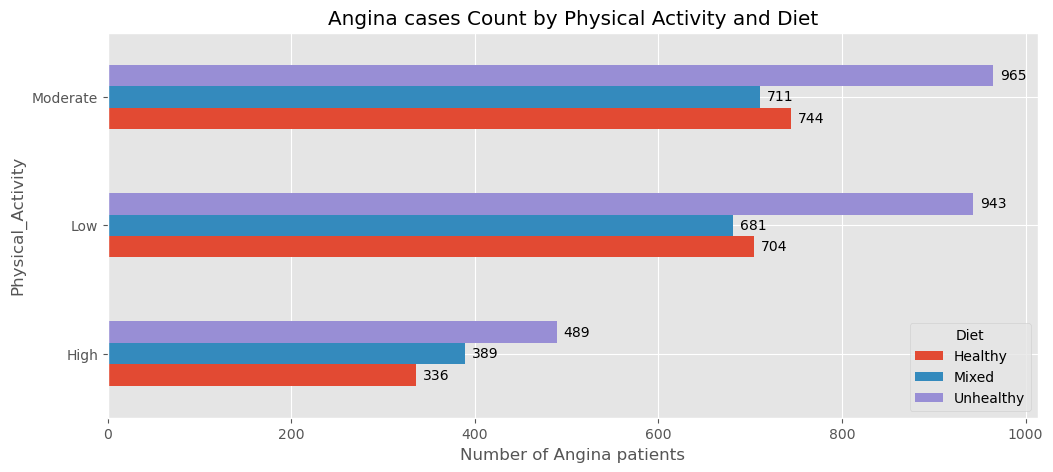

In [35]:
ax = df.groupby(['Physical_Activity', 'Diet'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Angina cases Count by Physical Activity and Diet')
ax.set_xlabel('Number of Angina patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)

plt.show()

[Text(5, 0, '28'), Text(5, 0, '73'), Text(5, 0, '85')]

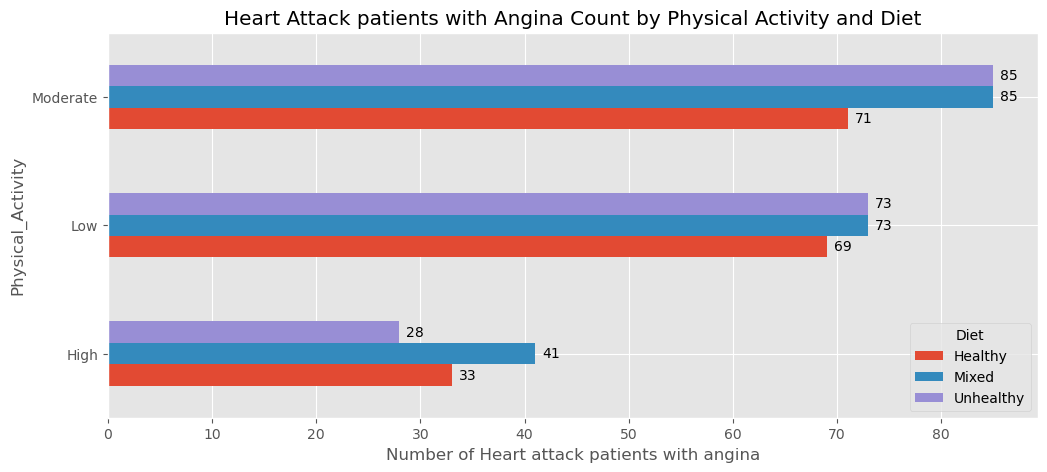

In [36]:
ax = df[(df["Angina"]==1 ) & (df["Heart_Attack"]==1)].groupby(['Physical_Activity', 'Diet'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart Attack patients with Angina Count by Physical Activity and Diet')
ax.set_xlabel('Number of Heart attack patients with angina')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)


##### Bar chart of the count of heart attack and angina patients grouped by Heart Disease History and Gender  

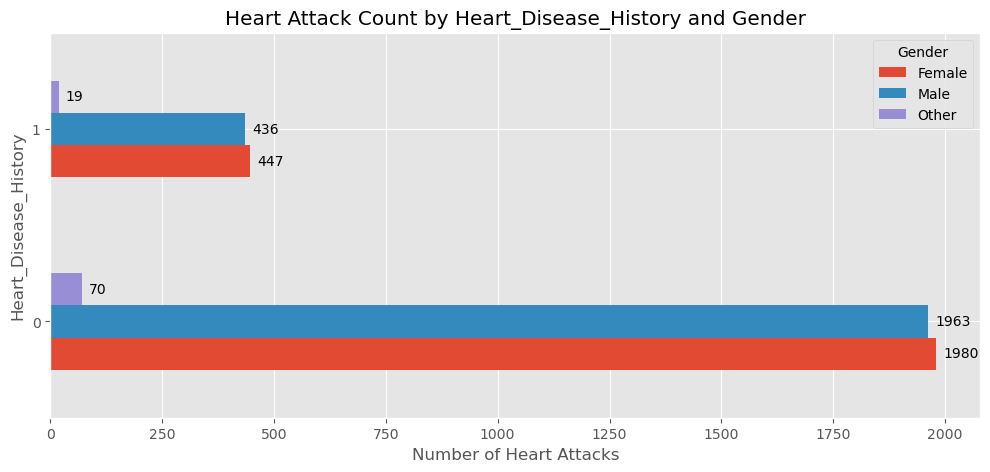

In [37]:
ax = df.groupby(['Heart_Disease_History', 'Gender'])["Heart_Attack"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart Attack Count by Heart_Disease_History and Gender')
ax.set_xlabel('Number of Heart Attacks')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)
plt.show()

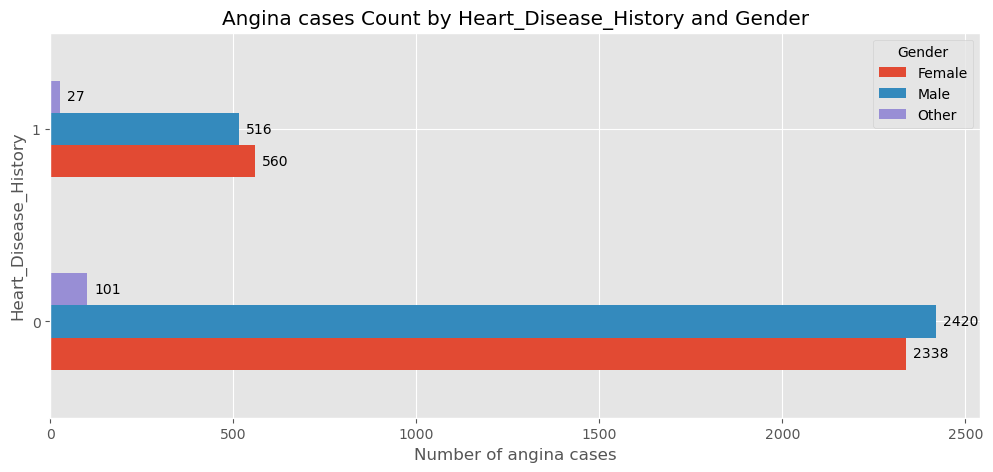

In [38]:
ax = df.groupby(['Heart_Disease_History', 'Gender'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Angina cases Count by Heart_Disease_History and Gender')
ax.set_xlabel('Number of angina cases')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)
plt.show()

[Text(5, 0, '7'), Text(5, 0, '2')]

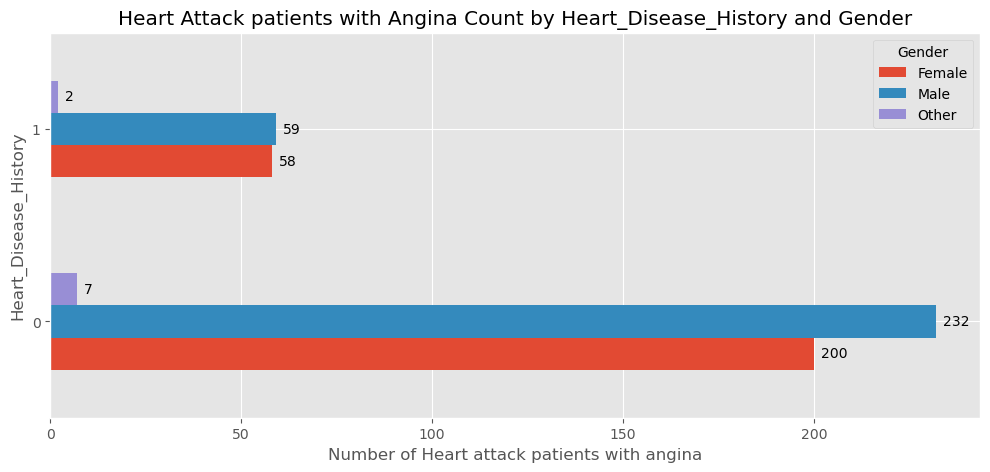

In [39]:
ax = df[(df["Angina"]==1 ) & (df["Heart_Attack"]==1)].groupby(['Heart_Disease_History', 'Gender'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart Attack patients with Angina Count by Heart_Disease_History and Gender')
ax.set_xlabel('Number of Heart attack patients with angina')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)

##### Bar chart of the count of heart attack and angina patients grouped by age group and physical activity  

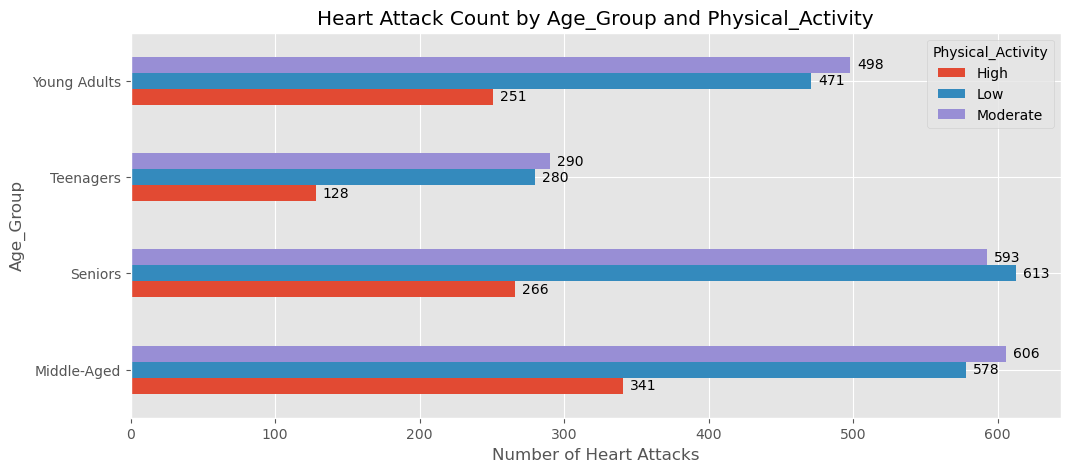

In [40]:
ax = df.groupby(['Age_Group', 'Physical_Activity'])["Heart_Attack"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart Attack Count by Age_Group and Physical_Activity')
ax.set_xlabel('Number of Heart Attacks')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)
plt.show()

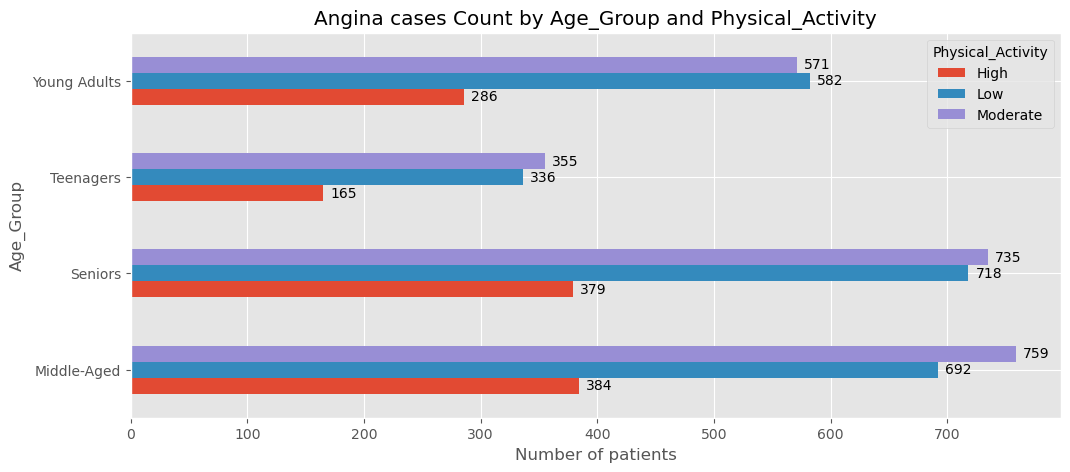

In [41]:
ax = df.groupby(['Age_Group', 'Physical_Activity'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Angina cases Count by Age_Group and Physical_Activity')
ax.set_xlabel('Number of patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)
plt.show()

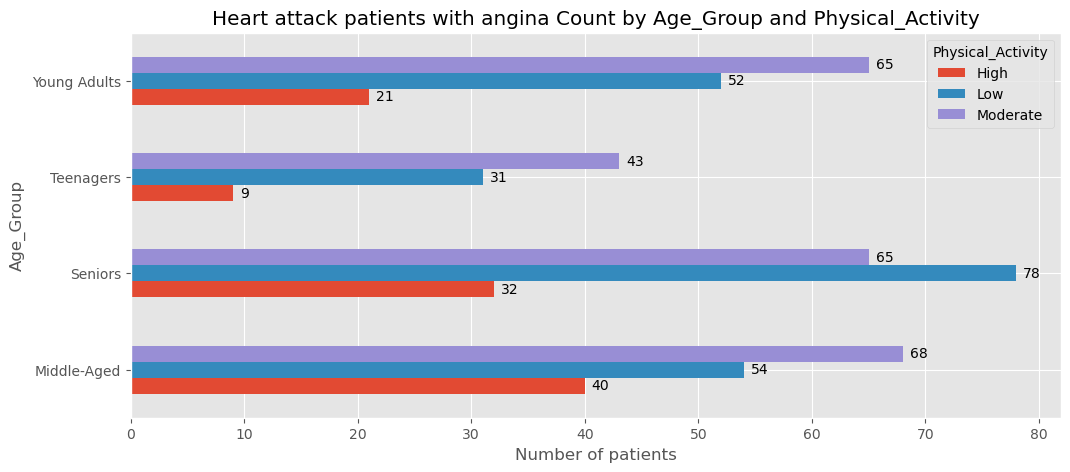

In [42]:
ax = df[(df["Angina"]==1)&(df["Heart_Attack"]==1)].groupby(['Age_Group', 'Physical_Activity'])["Angina"].agg('sum').unstack().plot(kind='barh', figsize=(12, 5), title='Heart attack patients with angina Count by Age_Group and Physical_Activity')
ax.set_xlabel('Number of patients')
ax.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[1], fontsize=10, color='black', padding=5)
ax.bar_label(ax.containers[2], fontsize=10, color='black', padding=5)
plt.show()

##### The average cholesterol level of heart attack and angina patients grouped by gender 

In [43]:
df[df["Heart_Attack"]==1].groupby("Gender")["Cholesterol"].agg('mean')

Gender
Female    211.518294
Male      214.249104
Other     209.285393
Name: Cholesterol, dtype: float64

In [44]:
df[df["Angina"]==1].groupby("Gender")["Cholesterol"].agg('mean')

Gender
Female    211.697239
Male      213.072446
Other     199.346094
Name: Cholesterol, dtype: float64

In [45]:
df[(df["Angina"]==1) & (df["Heart_Attack"]==1)].groupby("Gender")["Cholesterol"].agg('mean')

Gender
Female    213.290698
Male      212.175945
Other     200.166667
Name: Cholesterol, dtype: float64

##### The average blood pressure of heart attack and angina  patients grouped by gender 

In [46]:
df[df["Heart_Attack"]==1].groupby("Gender")["Blood_Pressure"].agg('mean')

Gender
Female    124.837330
Male      125.146103
Other     125.048315
Name: Blood_Pressure, dtype: float64

In [47]:
df[df["Angina"]==1].groupby("Gender")["Blood_Pressure"].agg('mean')

Gender
Female    124.609282
Male      125.571253
Other     123.942188
Name: Blood_Pressure, dtype: float64

In [48]:
df[(df["Angina"]==1) & (df["Heart_Attack"]==1)].groupby("Gender")["Blood_Pressure"].agg('mean')

Gender
Female    124.458527
Male      127.363918
Other     127.355556
Name: Blood_Pressure, dtype: float64

##### The average BMI of heart attack and angina  patients grouped by gender 

In [49]:
df[df["Heart_Attack"]==1].groupby("Gender")["BMI"].agg('mean')

Gender
Female    26.896745
Male      27.065902
Other     27.706742
Name: BMI, dtype: float64

In [50]:
df[df["Angina"]==1].groupby("Gender")["BMI"].agg('mean')

Gender
Female    27.061146
Male      27.055211
Other     27.493750
Name: BMI, dtype: float64

In [51]:
df[(df["Angina"]==1) & (df["Heart_Attack"]==1)].groupby("Gender")["BMI"].agg('mean')

Gender
Female    26.610465
Male      27.543986
Other     29.688889
Name: BMI, dtype: float64

##### The number of heart attack and angina patients grouped by physical activity and diet 

In [52]:
df[df["Heart_Attack"] == 1].groupby(["Physical_Activity", "Diet"])["ID"].agg('count').reset_index(name="Heart_Attack_Count")


,Physical_Activity,Diet,Heart_Attack_Count
0,High,Healthy,286
1,High,Mixed,318
2,High,Unhealthy,382
3,Low,Healthy,571
4,Low,Mixed,605
5,Low,Unhealthy,766
6,Moderate,Healthy,614
7,Moderate,Mixed,568
8,Moderate,Unhealthy,805


In [53]:
df[df["Angina"] == 1].groupby(["Physical_Activity", "Diet"])["ID"].agg('count').reset_index(name="Heart_Attack_Count")


,Physical_Activity,Diet,Heart_Attack_Count
0,High,Healthy,336
1,High,Mixed,389
2,High,Unhealthy,489
3,Low,Healthy,704
4,Low,Mixed,681
5,Low,Unhealthy,943
6,Moderate,Healthy,744
7,Moderate,Mixed,711
8,Moderate,Unhealthy,965


In [54]:
df[(df["Angina"] == 1) &(df["Heart_Attack"]==1)].groupby(["Physical_Activity", "Diet"])["ID"].agg('count').reset_index(name="Heart_Attack_Count")


,Physical_Activity,Diet,Heart_Attack_Count
0,High,Healthy,33
1,High,Mixed,41
2,High,Unhealthy,28
3,Low,Healthy,69
4,Low,Mixed,73
5,Low,Unhealthy,73
6,Moderate,Healthy,71
7,Moderate,Mixed,85
8,Moderate,Unhealthy,85


##### The number of heart  attack and angina patients grouped by region 

In [55]:
df[df["Heart_Attack"] == 1].groupby("Region")["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Region,No. of Heart_Attack patients
0,Rural,2955
1,Urban,1960


In [56]:
df[df["Angina"] == 1].groupby("Region")["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Region,No. of Heart_Attack patients
0,Rural,3543
1,Urban,2419


In [57]:
df[(df["Heart_Attack"] == 1) &(df["Angina"] == 1)].groupby("Region")["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Region,No. of Heart_Attack patients
0,Rural,331
1,Urban,227


##### The number of heart attack  and angina patients grouped by Age group and gender

In [58]:
df[df["Heart_Attack"] == 1].groupby(["Age_Group","Gender"])["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Age_Group,Gender,No. of Heart_Attack patients
0,Middle-Aged,Female,723
1,Middle-Aged,Male,772
2,Middle-Aged,Other,30
3,Seniors,Female,758
4,Seniors,Male,686
5,Seniors,Other,28
6,Teenagers,Female,346
7,Teenagers,Male,338
8,Teenagers,Other,14
9,Young Adults,Female,600


In [59]:
df[df["Angina"] == 1].groupby(["Age_Group","Gender"])["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Age_Group,Gender,No. of Heart_Attack patients
0,Middle-Aged,Female,887
1,Middle-Aged,Male,911
2,Middle-Aged,Other,37
3,Seniors,Female,891
4,Seniors,Male,898
5,Seniors,Other,43
6,Teenagers,Female,425
7,Teenagers,Male,418
8,Teenagers,Other,13
9,Young Adults,Female,695


In [60]:
df[(df["Heart_Attack"] == 1) & (df["Angina"] == 1)].groupby(["Age_Group","Gender"])["ID"].agg('count').reset_index(name="No. of Heart_Attack patients")


,Age_Group,Gender,No. of Heart_Attack patients
0,Middle-Aged,Female,69
1,Middle-Aged,Male,92
2,Middle-Aged,Other,1
3,Seniors,Female,86
4,Seniors,Male,84
5,Seniors,Other,5
6,Teenagers,Female,39
7,Teenagers,Male,43
8,Teenagers,Other,1
9,Young Adults,Female,64


##### The average cholesterol value of heart attack patients and angina grouped by Age group and gender

In [61]:
df[df["Heart_Attack"] == 1].groupby(["Age_Group","Gender"])["Cholesterol"].agg('mean').reset_index(name="Average Cholesterol level of heart attack patients")


,Age_Group,Gender,Average Cholesterol level of heart attack patients
0,Middle-Aged,Female,209.412586
1,Middle-Aged,Male,217.500259
2,Middle-Aged,Other,194.203333
3,Seniors,Female,213.770580
4,Seniors,Male,211.262391
5,Seniors,Other,222.489286
6,Teenagers,Female,207.319942
7,Teenagers,Male,213.858876
8,Teenagers,Other,229.564286
9,Young Adults,Female,213.631333


In [62]:
df[df["Angina"] == 1].groupby(["Age_Group","Gender"])["Cholesterol"].agg('mean').reset_index(name="Average Cholesterol level of heart attack patients")


,Age_Group,Gender,Average Cholesterol level of heart attack patients
0,Middle-Aged,Female,209.211950
1,Middle-Aged,Male,212.084413
2,Middle-Aged,Other,207.124324
3,Seniors,Female,216.189226
4,Seniors,Male,213.523942
5,Seniors,Other,190.255814
6,Teenagers,Female,208.852706
7,Teenagers,Male,215.391148
8,Teenagers,Other,193.707692
9,Young Adults,Female,210.849784


In [63]:
df[(df["Heart_Attack"] == 1) & (df["Angina"] == 1)].groupby(["Age_Group","Gender"])["Cholesterol"].agg('mean').reset_index(name="Average Cholesterol level of heart attack patients")


,Age_Group,Gender,Average Cholesterol level of heart attack patients
0,Middle-Aged,Female,213.972464
1,Middle-Aged,Male,218.375000
2,Middle-Aged,Other,235.900000
3,Seniors,Female,219.302326
4,Seniors,Male,209.096429
5,Seniors,Other,219.440000
6,Teenagers,Female,201.038462
7,Teenagers,Male,218.134884
8,Teenagers,Other,140.000000
9,Young Adults,Female,211.943750


##### The average Blood pressure value of heart attack  and angina patients grouped by Age group and gender

In [64]:
df[df["Heart_Attack"] == 1].groupby(["Age_Group","Gender"])["Blood_Pressure"].agg('mean').reset_index(name="Average blood presuure for Heart_Attack patients ")


,Age_Group,Gender,Average blood presuure for Heart_Attack patients
0,Middle-Aged,Female,124.536238
1,Middle-Aged,Male,125.449741
2,Middle-Aged,Other,127.090000
3,Seniors,Female,124.914908
4,Seniors,Male,125.793149
5,Seniors,Other,124.364286
6,Teenagers,Female,124.781214
7,Teenagers,Male,124.992012
8,Teenagers,Other,121.492857
9,Young Adults,Female,125.134500


In [65]:
df[df["Angina"] == 1].groupby(["Age_Group","Gender"])["Blood_Pressure"].agg('mean').reset_index(name="Average blood presuure for Heart_Attack patients ")


,Age_Group,Gender,Average blood presuure for Heart_Attack patients
0,Middle-Aged,Female,124.992221
1,Middle-Aged,Male,125.333370
2,Middle-Aged,Other,126.245946
3,Seniors,Female,124.338159
4,Seniors,Male,125.685746
5,Seniors,Other,120.306977
6,Teenagers,Female,124.689647
7,Teenagers,Male,125.928469
8,Teenagers,Other,122.900000
9,Young Adults,Female,124.418993


In [66]:
df[(df["Angina"] == 1)&(df["Heart_Attack"] == 1)].groupby(["Age_Group","Gender"])["Blood_Pressure"].agg('mean').reset_index(name="Average blood presuure for Heart_Attack patients ")


,Age_Group,Gender,Average blood presuure for Heart_Attack patients
0,Middle-Aged,Female,121.836232
1,Middle-Aged,Male,128.508696
2,Middle-Aged,Other,132.400000
3,Seniors,Female,126.626744
4,Seniors,Male,131.550000
5,Seniors,Other,124.880000
6,Teenagers,Female,121.943590
7,Teenagers,Male,125.872093
8,Teenagers,Other,119.600000
9,Young Adults,Female,125.904687


##### The number of heart attack and angina patients with angina 

In [67]:
count = df[(df["Heart_Attack"] == 1) & (df["Angina"] == 1)]["ID"].count()
print(f"No. of Heart_Attack patients with Angina: {count}")


No. of Heart_Attack patients with Angina: 558


##### The number of heart attack and angina patients suffering from obesity grouped by Age group and gender

In [68]:
df[df["Heart_Attack"] == 1].groupby(["Age_Group","Gender"])["Obesity"].agg('sum').reset_index(name="No. of obesete Heart_Attack patients ")


,Age_Group,Gender,No. of obesete Heart_Attack patients
0,Middle-Aged,Female,189
1,Middle-Aged,Male,190
2,Middle-Aged,Other,10
3,Seniors,Female,195
4,Seniors,Male,167
5,Seniors,Other,12
6,Teenagers,Female,89
7,Teenagers,Male,87
8,Teenagers,Other,2
9,Young Adults,Female,162


In [69]:
df[df["Angina"] == 1].groupby(["Age_Group","Gender"])["Obesity"].agg('sum').reset_index(name="No. of obesete Angina patients ")


,Age_Group,Gender,No. of obesete Angina patients
0,Middle-Aged,Female,211
1,Middle-Aged,Male,226
2,Middle-Aged,Other,11
3,Seniors,Female,197
4,Seniors,Male,233
5,Seniors,Other,12
6,Teenagers,Female,110
7,Teenagers,Male,92
8,Teenagers,Other,2
9,Young Adults,Female,187


In [70]:
df[(df["Angina"] == 1)&(df["Heart_Attack"]==1)].groupby(["Age_Group","Gender"])["Obesity"].agg('sum').reset_index(name="No. of obesete Angina patients with angina ")


,Age_Group,Gender,No. of obesete Angina patients with angina
0,Middle-Aged,Female,20
1,Middle-Aged,Male,22
2,Middle-Aged,Other,1
3,Seniors,Female,26
4,Seniors,Male,22
5,Seniors,Other,2
6,Teenagers,Female,14
7,Teenagers,Male,10
8,Teenagers,Other,0
9,Young Adults,Female,15


##### Distribution of heart attack patients by Age , Blodd pressure , cholesterol , BMI , heart rate , stress level and health awareness

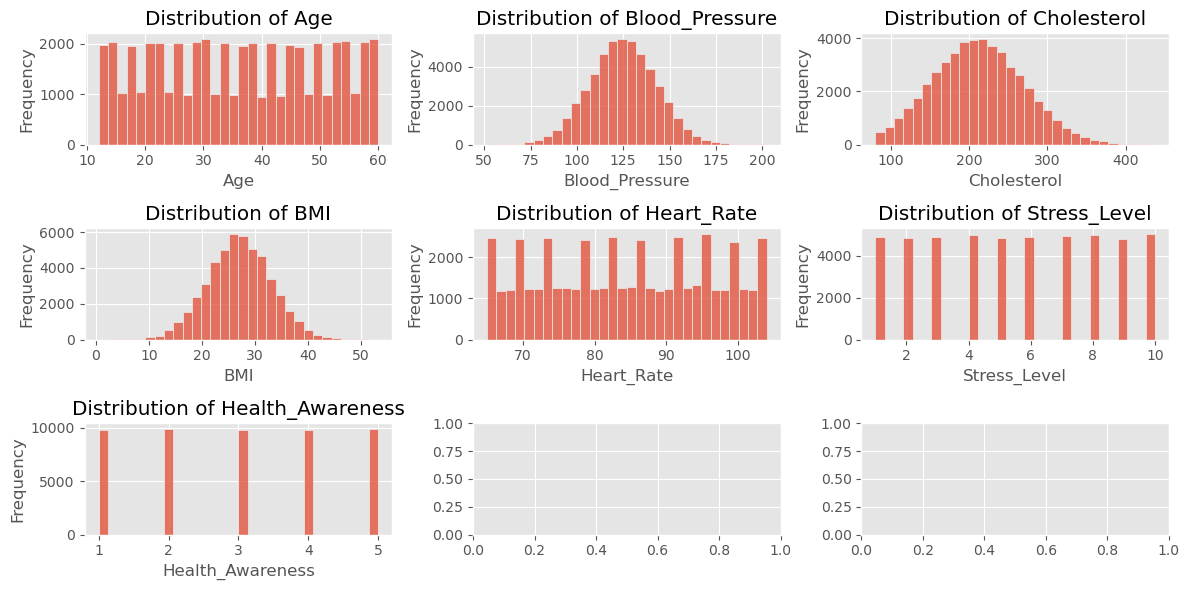

In [71]:


columns = ["Age", "Blood_Pressure", "Cholesterol", "BMI", "Heart_Rate", "Stress_Level", "Health_Awareness"]
n_cols = 3  # Number of columns in the matrix
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows to fit all plots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  
axes = axes.flatten()  # Flatten axes to make it easier to iterate over

for i, column in enumerate(columns):
    sns.histplot(df[column], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()

